In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
covid_df = pd.read_csv('Resources/covid.csv')
covid_df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


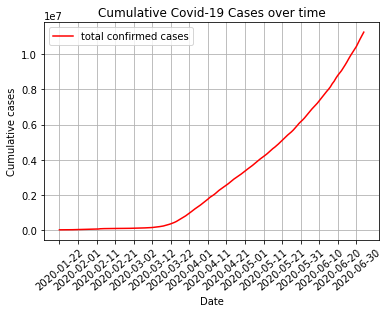

In [3]:
covid_cases= covid_df["Confirmed"]
#fig= plt.figure(figsize=(15,15))
x_axis1=covid_df["Date"]
y_axis1=covid_cases
line1 = plt.plot(x_axis1, y_axis1, color="red", label="total confirmed cases")

plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Covid-19 Cases over time')

plt.xticks(np.arange(0, 170, step=10))
plt.xticks(rotation=40) 

plt.grid()
plt.show()


In [4]:
total_cases=covid_df["Confirmed"].max()
total_cases

11266568

In [5]:
total_deaths=covid_df["Deaths"].max()
total_deaths

530738

In [6]:
death_rate=(total_deaths/total_cases)*100
death_rate

4.710733561453674

In [7]:
#read in CSV file
covid_by_country_df = pd.read_csv('Resources/covid_by_Country.csv')
covid_by_country_df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,34740,1048,21454,12238,285,36,200,3.02,61.76,4.88,33384,1356,4.06,Eastern Mediterranean
1,Albania,3667,97,2062,1508,96,2,48,2.65,56.23,4.70,3038,629,20.70,Europe
2,Algeria,20216,1028,14295,4893,527,10,276,5.09,70.71,7.19,16879,3337,19.77,Africa
3,Andorra,861,52,803,6,3,0,0,6.04,93.26,6.48,855,6,0.70,Europe
4,Angola,541,26,118,397,16,0,0,4.81,21.81,22.03,386,155,40.16,Africa


In [8]:
#sort by number of cases
sorted_covid_world_df = covid_by_country_df.sort_values(by=['Confirmed'], ascending=False)
sorted_covid_world_df.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,3431574,136466,1049098,2246010,67417,900,17159,3.98,30.57,13.01,2996098,435476,14.53,Americas
23,Brazil,1926824,74133,1323425,529266,41857,1300,32174,3.85,68.68,5.60,1668589,258235,15.48,Americas
79,India,936181,24309,592032,319840,29429,582,20572,2.60,63.24,4.11,742417,193764,26.10,South-East Asia
138,Russia,738787,11597,511958,215232,6240,175,8790,1.57,69.30,2.27,693215,45572,6.57,Europe
132,Peru,333867,12229,223261,98377,3744,175,2253,3.66,66.87,5.48,309278,24589,7.95,Americas
35,Chile,319493,7069,289220,23204,1836,45,2664,2.21,90.52,2.44,301019,18474,6.14,Americas
111,Mexico,311486,36327,245830,29329,7051,836,5729,11.66,78.92,14.78,268008,43478,16.22,Americas
154,South Africa,298292,4346,146279,147667,10496,174,8038,1.46,49.04,2.97,215855,82437,38.19,Africa
177,United Kingdom,292931,45053,1385,246493,1240,138,1,15.38,0.47,3252.92,287874,5057,1.76,Europe
81,Iran,262173,13211,225270,23692,2521,179,2731,5.04,85.92,5.86,245688,16485,6.71,Eastern Mediterranean


In [9]:
# US_df=covid_by_couuntry_df.loc[covid_by_couuntry_df["Country/Region"]=="US"]
# US_cases= US_df["Confirmed"]
# x_axis1=guinea_df["Date"]
# y_axis1=guinea_cases
# fig= plt.figure(figsize=(15,15))
# plt.bar(x_axis1, y_axis1, color="darkturquoise", label="Guinea"
                
                

In [10]:
#bar chart top 20 world

In [11]:
covid_by_country_df.rename(columns={'WHO Region': 'WHO_Region'}, inplace=True)
covid_by_country_df
covid_by_country_df.WHO_Region.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [21]:
#stats by region
americas_df=covid_by_country_df.loc[covid_by_country_df["WHO_Region"]=="Americas"]
# americas_df.head()
top_ten_americas=americas_df.nlargest(10,'Confirmed')
top_ten_americas

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
173,US,3431574,136466,1049098,2246010,67417,900,17159,3.98,30.57,13.01,2996098,435476,14.53,Americas
23,Brazil,1926824,74133,1323425,529266,41857,1300,32174,3.85,68.68,5.60,1668589,258235,15.48,Americas
132,Peru,333867,12229,223261,98377,3744,175,2253,3.66,66.87,5.48,309278,24589,7.95,Americas
35,Chile,319493,7069,289220,23204,1836,45,2664,2.21,90.52,2.44,301019,18474,6.14,Americas
111,Mexico,311486,36327,245830,29329,7051,836,5729,11.66,78.92,14.78,268008,43478,16.22,Americas
37,Colombia,154277,5787,65809,82681,3832,153,2358,3.75,42.66,8.79,120281,33996,28.26,Americas
32,Canada,110337,8844,0,101493,366,9,0,8.02,0.00,inf,108010,2327,2.15,Americas
6,Argentina,106910,1968,45467,59475,3645,65,1294,1.84,42.53,4.33,83426,23484,28.15,Americas
51,Ecuador,69570,5130,30484,33956,1111,67,115,7.37,43.82,16.83,63245,6325,10.00,Americas
20,Bolivia,50867,1898,15819,33150,1617,32,525,3.73,31.10,12.00,41545,9322,22.44,Americas


Text(0.5, 1.0, 'Number of confirmed cases Americas')

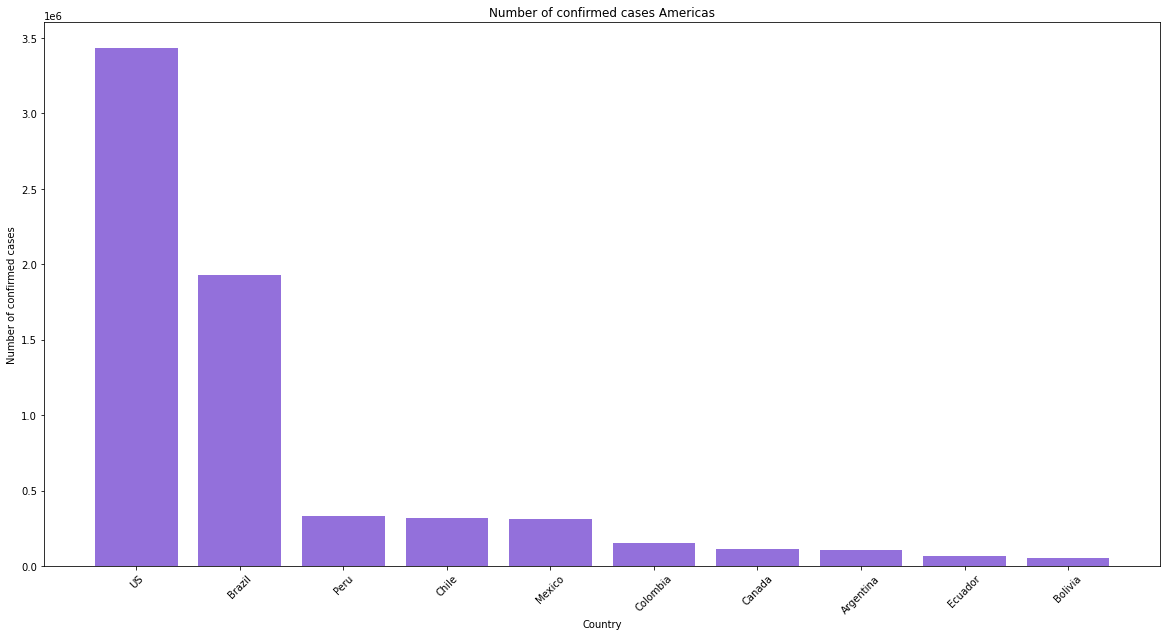

In [30]:
# fig= plt.figure(figsize=(10,10))
# americas_df.plot(kind="bar", color= 'cornflowerblue')
# plt.xlabel("Country/Region")
# plt.xticks(rotation=40)
# plt.ylabel("Number of cases")
# plt.title("Total ebola cases per country")

x_axis= top_ten_americas['Country/Region']
y_axis= top_ten_americas['Confirmed']
fig= plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='mediumpurple', align="center")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of confirmed cases")
plt.title("Number of confirmed cases Americas")

In [14]:
pacific_df=covid_by_country_df.loc[covid_by_country_df["WHO_Region"]=="Western Pacific"]
pacific_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
8,Australia,10487,111,7928,2448,236,3,93,1.06,75.60,1.40,8886,1601,18.02,Western Pacific
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific
30,Cambodia,165,0,133,32,0,0,0,0.00,80.61,0.00,141,24,17.02,Western Pacific
36,China,85226,4642,78190,2394,109,1,59,5.45,91.74,5.94,84917,309,0.36,Western Pacific
59,Fiji,26,0,18,8,0,0,0,0.00,69.23,0.00,21,5,23.81,Western Pacific


H1N1

In [15]:
h1n1_df = pd.read_csv('Resources/H1N1.csv')
h1n1_df

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/
...,...,...,...,...,...
2485,2009-07-06,Venezuela,206,0,https://www.who.int/csr/don/2009_07_06/en/
2486,2009-07-06,Viet Nam,181,0,https://www.who.int/csr/don/2009_07_06/en/
2487,2009-07-06,Virgin Islands,1,0,https://www.who.int/csr/don/2009_07_06/en/
2488,2009-07-06,West Bank and Gaza Strip,60,0,https://www.who.int/csr/don/2009_07_06/en/


In [23]:
#clean data
h1n1_df.drop(columns=['Link'])

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [17]:
# sorted_h1n1_df = h1n1_df.sort_values(by=['Cumulative no. of cases'], ascending=False)
# sorted_h1n1_df

In [26]:
total_h1n1_cases= h1n1_df.groupby(["Country"])["Cumulative no. of cases"].max()
total_h1n1_cases
total_h1n1_cases_df = pd.DataFrame(total_h1n1_cases)
total_h1n1_cases_df.reset_index(inplace=True)
total_h1n1_cases_df

,Country,Cumulative no. of cases
0,Algeria,5
1,Antigua and Barbuda,2
2,Argentina,2485
3,Australia,5298
4,Austria,19
...,...,...
143,Venezuela,206
144,Viet Nam,181
145,Virgin Islands,1
146,West Bank and Gaza Strip,60


In [28]:
#top 15 world
top_fifteen_h1n1=total_h1n1_cases_df.nlargest(15,'Cumulative no. of cases')
top_fifteen_h1n1

,Country,Cumulative no. of cases
140,United States of America,33902
82,Mexico,10262
19,Canada,7983
137,United Kingdom,7447
22,Chile,7376
3,Australia,5298
2,Argentina,2485
128,Thailand,2076
23,China,2040
67,Japan,1790


Text(0.5, 1.0, 'Number of confirmed h1n1 cases')

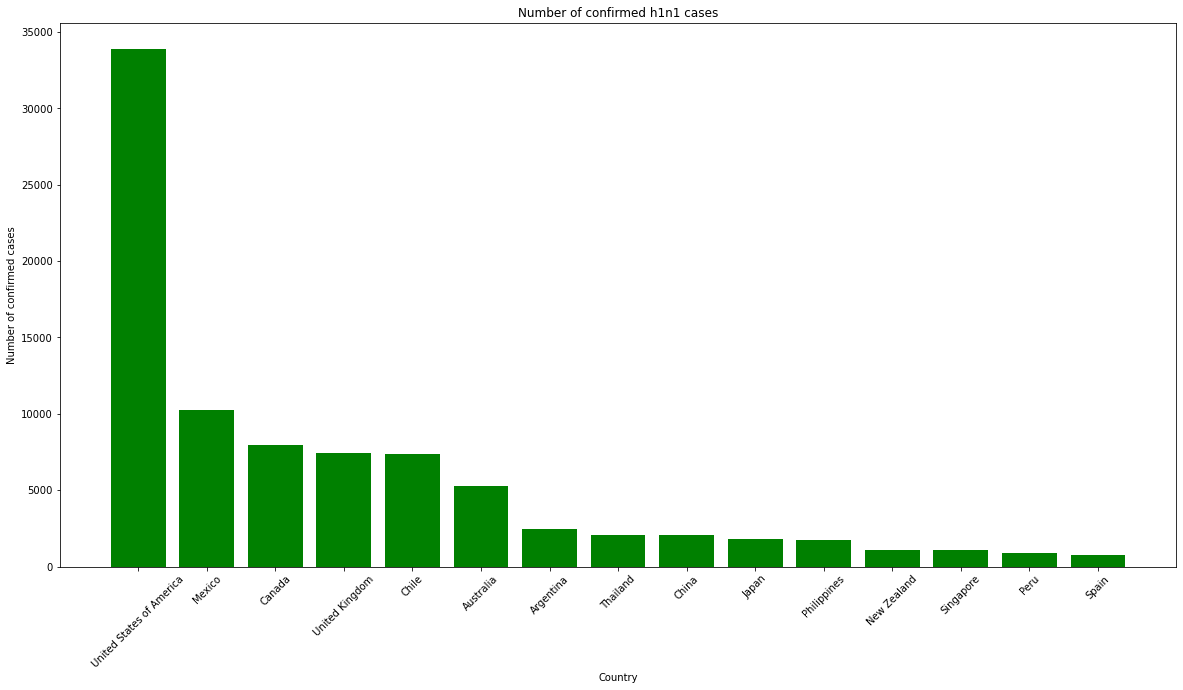

In [29]:
#bar plot yop 15 h1n1
x_axis= top_fifteen_h1n1['Country']
y_axis= top_fifteen_h1n1['Cumulative no. of cases']
fig= plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='green', align="center")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of confirmed cases")
plt.title("Number of confirmed h1n1 cases")

In [ ]:
#line plots
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_deaths
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

plt.legend(loc="best")
plt.ylabel('Cumulative Deaths')
plt.xlabel("Date")
plt.title('Cumulative Ebola Deaths over time')
plt.xticks(np.arange(0, 300, step=20))
plt.grid()
plt.xlim(xmin=0)
plt.xlim(xmax=240)